In [86]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [89]:
# Load training and testing data
training_data = pd.read_pickle('/Users/Anshu/MLCS_Project/training_data_CaseCompanyStockChange.pkl');
testing_data = pd.read_pickle('/Users/Anshu/MLCS_Project/testing_data_CaseCompanyStockChange.pkl');


#train
X = training_data.loc[training_data['CompanyName_AAR CORP'] == 1]
y_train = X[['ChangeInStockPrice']]
X = X[['Vector']]
y_train = y_train.values

#test
X_test = testing_data.loc[training_data['CompanyName_AAR CORP'] == 1]
y_test = X_test[['ChangeInStockPrice']]
X_test = X_test[['Vector']]

print(len(y_train))

print(len(X))

332
332


In [90]:
# convert word vector list to columns in the dataframe
wordVector_to_columns_train = pd.DataFrame(X['Vector'].values.tolist())

wordVector_to_columns_test  = pd.DataFrame(X_test['Vector'].values.tolist())

X_train = wordVector_to_columns_train.values

X_test = wordVector_to_columns_test.values

# Dimensions of dataset
num_of_inputVectors = X_train.shape[0]
num_of_features = X_train.shape[1]

print(num_of_inputVectors)
print(num_of_features)

332
300


In [91]:
X_input = tf.placeholder(dtype=tf.float32,shape=[None,300])
y_output = tf.placeholder(dtype=tf.float32,shape=[None,1])

In [92]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [93]:
#Model architecture parameters
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128
n_target = 1

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([num_of_features, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

#Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

#Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))


# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [94]:
# Output weights
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))

In [95]:
# Hidden layer
#wordVector_to_columns = tf.cast(wordVector_to_columns,tf.float32)
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X_input, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [96]:
# Output layer (transpose!)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

In [97]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, y_output))

In [98]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [99]:
# Session
net = tf.InteractiveSession()

#Init
net.run(tf.global_variables_initializer())

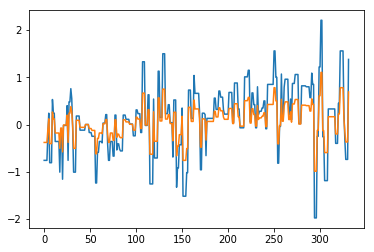

In [100]:
# Setup plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_train)
line2, = ax1.plot(y_train * 0.5)
plt.show()

In [101]:
# Fit neural net
batch_size = 100
mse_train = []
mse_test = []

In [102]:
# Run
epochs = 4
for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        
        # Run optimizer with batch
        net.run(opt, feed_dict={X_input: batch_x, y_output: batch_y})

        # Show progress
        if np.mod(i, 1) == 0:
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict={X_input: X_train, y_output: y_train}))
            mse_test.append(net.run(mse, feed_dict={X_input: X_test, y_output: y_test})) 
            
            print(e)
            print(i)
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            
            # Prediction
            pred = net.run(out, feed_dict={X_input: X_test})
            
            print(pred,y_test)
            
            #line2.set_ydata(pred)
            #plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            #plt.pause(0.01)

0
0
MSE Train:  34.140915
MSE Test:  37530.59
[[5.7840023 5.201994  4.6486654 6.767106  5.7824345 6.0465355 5.88166
  4.950146  6.8910437 7.658916  5.458863  6.5966206 4.135506  6.5894213
  5.4297624 6.123678  5.9361854 5.6614995 5.5139694 5.9284368 6.050838
  5.68737   5.9808583 6.3746996 6.2639937 7.4777656 5.9524145 5.3179173
  7.108669  6.716083  5.2883    5.470552  6.3180795 5.715757  5.2487674
  5.7101398 7.8493657 5.2592635 6.3926725 5.3451343 6.2582455 5.256696
  8.250149  7.6618953 5.8980527 5.3379254 5.6293597 6.789223  5.17765
  7.0365624 8.868199  6.039679  5.460693  6.436969  6.45598   6.501985
  7.675725  6.8696437 7.5228567 6.744326  5.8460736 5.6633763 5.9231505
  4.8586035 6.6678042 5.293731  4.428889  6.478844  6.819312  6.282906
  6.042521  5.170405  5.368953  5.516445  5.248799  5.714921  6.787234
  7.0125422 4.7285132 4.162423  5.687799  6.287794  7.946832  5.557448
  5.692331  5.2950454 6.5801587 2.8871925 7.1562505 8.236934  5.664804
  6.4559045 7.027782  5.83004

1
0
MSE Train:  1.1078167
MSE Test:  37380.99
[[-0.82944155 -0.5296546  -0.43661064 -0.6518157  -0.36060095 -0.8697822
  -0.64738685 -0.73993284 -0.68887424 -0.33934712 -0.6353435  -0.18865871
  -0.45274982 -0.5603497  -0.86040246 -0.71582913 -0.47734115 -1.0370903
  -0.6156042  -0.59754014 -0.754449   -0.12246834 -0.73291236 -0.40898487
  -0.7036774  -1.0405988  -0.6934243  -0.6127177  -0.5689806  -0.14887175
  -0.22014    -0.7242949  -0.2707907  -0.6879657  -0.5020429  -0.6266852
  -0.7435213  -0.5642289  -1.0432696  -0.7961596  -0.37788367 -0.6290405
  -0.795841   -0.90055865 -0.80077845 -0.43004993 -0.5039884  -0.5850741
  -0.4465916  -0.23226659 -0.978403   -0.62901396 -0.8981874  -0.57517886
  -0.76862794 -0.47445905 -0.6638861  -0.96216875 -0.72976786 -0.85295665
  -0.96163684 -0.6347995  -0.9157156  -0.528402   -0.5633358  -0.34757146
  -0.5939615  -0.7195763  -0.73822725 -0.72641325 -0.5592866  -0.26451322
  -1.0579376  -0.35380435 -0.3851727  -0.7026135  -0.51022315 -0.734582

2
0
MSE Train:  0.8028113
MSE Test:  37403.152
[[0.8888242  0.4851048  0.3596431  0.56989086 0.8308923  0.5616089
  0.47124216 0.5674919  1.0365529  0.9935343  0.690441   0.9245342
  0.464507   0.8174957  0.4726873  0.58049655 0.5975068  0.37760743
  0.65820694 0.3881068  0.6652045  0.76415133 0.6455799  0.89004743
  0.5503429  0.6796     0.75486827 0.6323903  0.7062657  0.9983628
  0.8427582  0.57106376 0.90110314 0.5409876  0.649753   0.90697736
  0.80317926 0.7322943  0.36051685 0.46651846 0.96540004 0.7490798
  1.1004317  0.8769959  0.599205   0.5814023  0.6149369  0.8593483
  0.6724156  1.0291995  0.67125    0.71126723 0.49344236 0.67195183
  0.39927617 0.70708084 0.9899893  0.4925099  0.92980933 0.7513095
  0.20131083 0.69407904 0.5912243  0.5269923  0.9151958  0.35131985
  0.50907594 0.6475211  0.71962374 0.82047576 0.7240651  0.85623896
  0.22179623 0.7786453  0.7873613  0.77195114 0.59505796 0.5635494
  0.65246534 0.49338838 0.42145878 0.6622275  0.95258677 0.7882866
  0.83880

3
0
MSE Train:  0.8030526
MSE Test:  37384.066
[[-0.3426121  -0.48987943 -0.39042318 -0.51895285 -0.39866072 -0.6152589
  -0.4048308  -0.2951204  -0.45639002 -0.5168234  -0.42098722 -0.555405
  -0.33696654 -0.3150825  -0.5061402  -0.61237806 -0.33072045 -0.6325088
  -0.32100502 -0.42182556 -0.33010873 -0.32363886 -0.6698039  -0.36842448
  -0.4122594  -0.5024981  -0.44299167 -0.37115282 -0.5156045  -0.20500664
  -0.50496644 -0.36798954 -0.25904432 -0.440306   -0.33421    -0.336788
  -0.5599063  -0.39090833 -0.5262245  -0.43102163 -0.31322557 -0.18947531
  -0.4047914  -0.48370886 -0.41653872 -0.35052395 -0.4090029  -0.5612936
  -0.20901327 -0.31314725 -0.63823795 -0.39597017 -0.5209728  -0.60673
  -0.44508165 -0.48624796 -0.3021043  -0.67017895 -0.51875997 -0.43355352
  -0.66481876 -0.33284295 -0.6021059  -0.4251222  -0.41390073 -0.36112353
  -0.26643452 -0.57790583 -0.5071672  -0.3462054  -0.5146787  -0.25660837
  -0.72244126 -0.16416039 -0.20367993 -0.4783507  -0.5298754  -0.58278185
 